In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import datetime
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

In [122]:
df_validation = pd.read_csv(r'../../data/tidy/energy_validation_april2022.csv', delimiter=',', skiprows=0, low_memory=False)

In [123]:
df_validation['date']=pd.to_datetime(df_validation['date'])

In [124]:
df_model = pd.read_csv(r'../../results/computed-fuel-rates.csv', delimiter=',', skiprows=0, low_memory=False)

In [125]:
len(df_model['Vehicle'].unique())

178

In [126]:
len(df_validation['equipment_id'].unique())

174

In [127]:
validation_vehicles=df_validation['equipment_id'].unique()

In [128]:
df_model_filtered=df_model.loc[df_model.Vehicle.isin(validation_vehicles)]

In [129]:
len(df_model_filtered['Vehicle'].unique())

171

In [130]:
model_vehicles=df_model['Vehicle'].unique()

In [131]:
df_validation_filtered=df_validation.loc[df_validation.equipment_id.isin(model_vehicles)]

In [132]:
len(df_validation_filtered['equipment_id'].unique())

171

In [133]:
### Now we have similarly 171 common vehicle in both validation and model

In [134]:
df_model_CDB = df_model_filtered[df_model_filtered.Powertrain == 'conventional'].copy()

In [135]:
df_model_HEB = df_model_filtered[df_model_filtered.Powertrain == 'hybrid'].copy()

In [136]:
df_model_BEB = df_model_filtered[df_model_filtered.Powertrain == 'electric'].copy()

In [137]:
df_daily_energy_model_CDB = df_model_CDB.groupby(['Date']).agg({'Energy':'sum'})[['Energy']].reset_index()

In [138]:
df_daily_energy_model_HEB = df_model_HEB.groupby(['Date']).agg({'Energy':'sum'})[['Energy']].reset_index()

In [139]:
df_daily_energy_model_BEB = df_model_BEB.groupby(['Date']).agg({'Energy':'sum'})[['Energy']].reset_index()

In [140]:
df_validation_CDB = df_validation_filtered[df_validation_filtered.Powertrain == 'conventional'].copy()

In [141]:
df_validation_HEB = df_validation_filtered[df_validation_filtered.Powertrain == 'hybrid'].copy()

In [142]:
df_validation_BEB = df_validation_filtered[df_validation_filtered.Powertrain == 'electric'].copy()

In [143]:
df_daily_energy_validation_CDB = df_validation_CDB.groupby('date').agg({'gallons':'sum'})[['gallons']].reset_index()

In [144]:
df_daily_energy_validation_HEB = df_validation_HEB.groupby('date').agg({'gallons':'sum'})[['gallons']].reset_index()

In [145]:
df_daily_energy_validation_BEB = df_validation_BEB.groupby('date').agg({'gallons':'sum'})[['gallons']].reset_index()

In [146]:
#df_validation_diesel = df_validation_filtered.groupby('date').agg({'gallons':'sum'})[['gallons']].reset_index()

In [147]:
len(df_model_CDB['Vehicle'].unique())

152

In [148]:
len(df_validation_CDB['equipment_id'].unique())

152

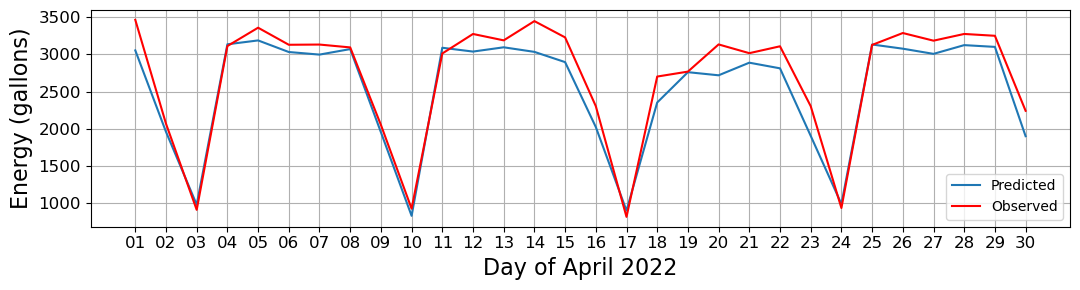

In [149]:
# Plot time series
#figure(figsize=(12, 8), dpi=400)
fig, ax = plt.subplots(figsize=(11, 3))

fig=plt.plot(df_daily_energy_model_CDB.Date, df_daily_energy_model_CDB.Energy, label='Predicted')
fig=plt.plot(df_daily_energy_validation_CDB.gallons, label='Observed', color='red')
#fig=plt.plot(df_daily_energy_validation_CDB.date, df_daily_energy_validation_CDB.gallons, label='Observed', color='red')

# Add title and labels

plt.xlabel('Day of April 2022', fontsize=16)
plt.ylabel('Energy (gallons)', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend

plt.legend()

# Auto space

plt.tight_layout()

# Set major formatter
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

plt.grid()

plt.savefig(r'../../figures/timeseries-energy-CDB.png', dpi=400, bbox_inches='tight')

# Display plot

plt.show() 

In [150]:
len(df_model_HEB['Vehicle'].unique())

9

In [151]:
len(df_validation_HEB['equipment_id'].unique())

9

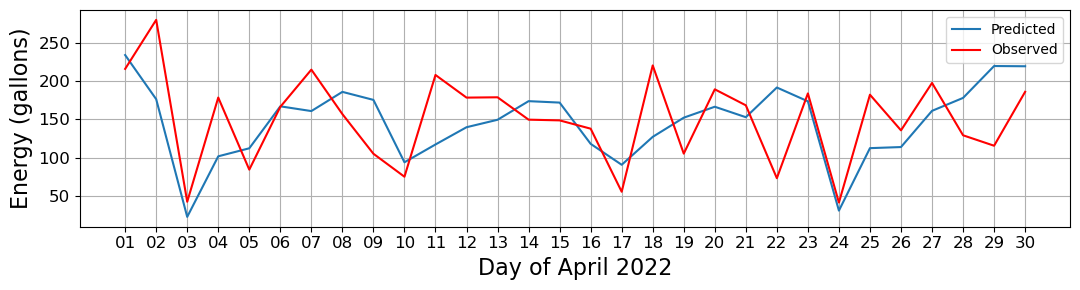

In [152]:
# Plot time series
#figure(figsize=(12, 8), dpi=400)
fig, ax = plt.subplots(figsize=(11, 3))

fig=plt.plot(df_daily_energy_model_HEB.Date, df_daily_energy_model_HEB.Energy, label='Predicted')
fig=plt.plot(df_daily_energy_validation_HEB.gallons, label='Observed', color='red')

# Add title and labels

plt.xlabel('Day of April 2022', fontsize=16)
plt.ylabel('Energy (gallons)', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend

plt.legend()

# Auto space

plt.tight_layout()


plt.grid()

# Set major formatter
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

plt.savefig(r'../../figures/timeseries-energy-HEB.png', dpi=400, bbox_inches='tight')

# Display plot

plt.show() 

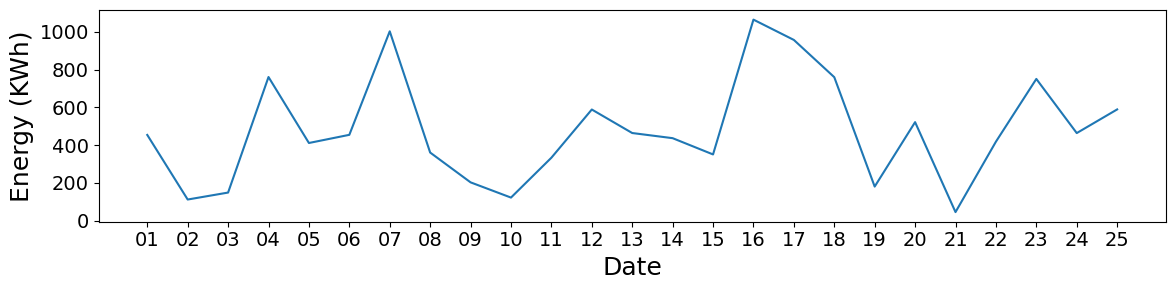

In [153]:
# Plot time series
#figure(figsize=(12, 8), dpi=400)
fig, ax = plt.subplots(figsize=(12, 3))

fig=plt.plot(df_daily_energy_model_BEB.Date, df_daily_energy_model_BEB.Energy, label='Model')
#fig=plt.plot(df_validation_BEB.date, df_validation_BEB.gallons, label='Actual', color='red', linewidth=3)

# Add title and labels

plt.xlabel('Date', fontsize=18)
plt.ylabel('Energy (KWh)', fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add legend

#plt.legend()

# Auto space

plt.tight_layout()

# Set major formatter
date_form = DateFormatter("%d")
ax.xaxis.set_major_formatter(date_form)

plt.savefig(r'../../figures/timeseries-energy-BEB.png', dpi=400, bbox_inches='tight')

# Display plot

plt.show() 

In [154]:
df_model_CDB.nlargest(5, 'Energy')

Unnamed: 0.4  Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  \
1239284       1239284       1239284       1239284       1239908   
1147780       1147780       1147780       1147780       1148306   
1171236       1171236       1171236       1171236       1171769   
1178907       1178907       1178907       1178907       1179445   
1049175       1049175       1049175       1049175       1049579   

             ServiceDateTime  Unnamed: 0  DateKey             CalendarDate  \
1239284  2022-04-16 22:22:13      734460     8775  2022-04-16 00:00:00.000   
1147780  2022-04-18 19:28:03      795469     8777  2022-04-18 00:00:00.000   
1171236  2022-04-20 18:51:56      898015     8779  2022-04-20 00:00:00.000   
1178907  2022-04-15 18:41:54      694124     8774  2022-04-15 00:00:00.000   
1049175  2022-04-21 18:53:04      948594     8780  2022-04-21 00:00:00.000   

         Year  Month  ...  time_delta_in_seconds      dist     Speed  \
1239284  2022      4  ...                73596.0  0.964225  0.075906   
1147780  2022      4  ...                67784.0  0.217490  0.018589   
1171236  2022      4  ...                65610.0  0.640671  0.056574   
1178907  2022      4  ...                62003.0  0.889334  0.083100   
1049175  2022      4  ...                61900.0  0.640671  0.059965   

         Acceleration    Powertrain    VehicleModel  Vehicle_mass elevation  \
1239284 -2.884899e-05  conventional  NEW FLYER XD40         28250      97.0   
1147780 -7.816170e-05  conventional       Gillig 35         26440      50.0   
1171236  2.395210e-07  conventional       Gillig 40         27180      82.0   
1178907 -3.071363e-05  conventional       Gillig 40         27180      94.0   
1049175 -3.718024e-05  conventional       Gillig 40         27180      82.0   

            grade     Energy  
1239284  0.022551  32.721507  
1147780 -0.034290  30.011540  
1171236  0.000000  29.066680  
1178907  0.022355  27.572441  
1049175  0.019393  27.487576  

[5 rows x 50 columns]

In [155]:
df_diesel = df_validation[df_validation['Powertrain'] != 'electric'].copy()

In [156]:
df_validation_diesel = df_diesel.groupby(['date','equipment_id']).agg({'gallons':'sum'})[['gallons']].reset_index()

In [157]:
df_validation_diesel['date']= pd.to_datetime(df_validation_diesel['date'])

In [158]:
df_validation_diesel=df_validation_diesel.set_index('date')

In [159]:
vehicles=df_validation_diesel['equipment_id']

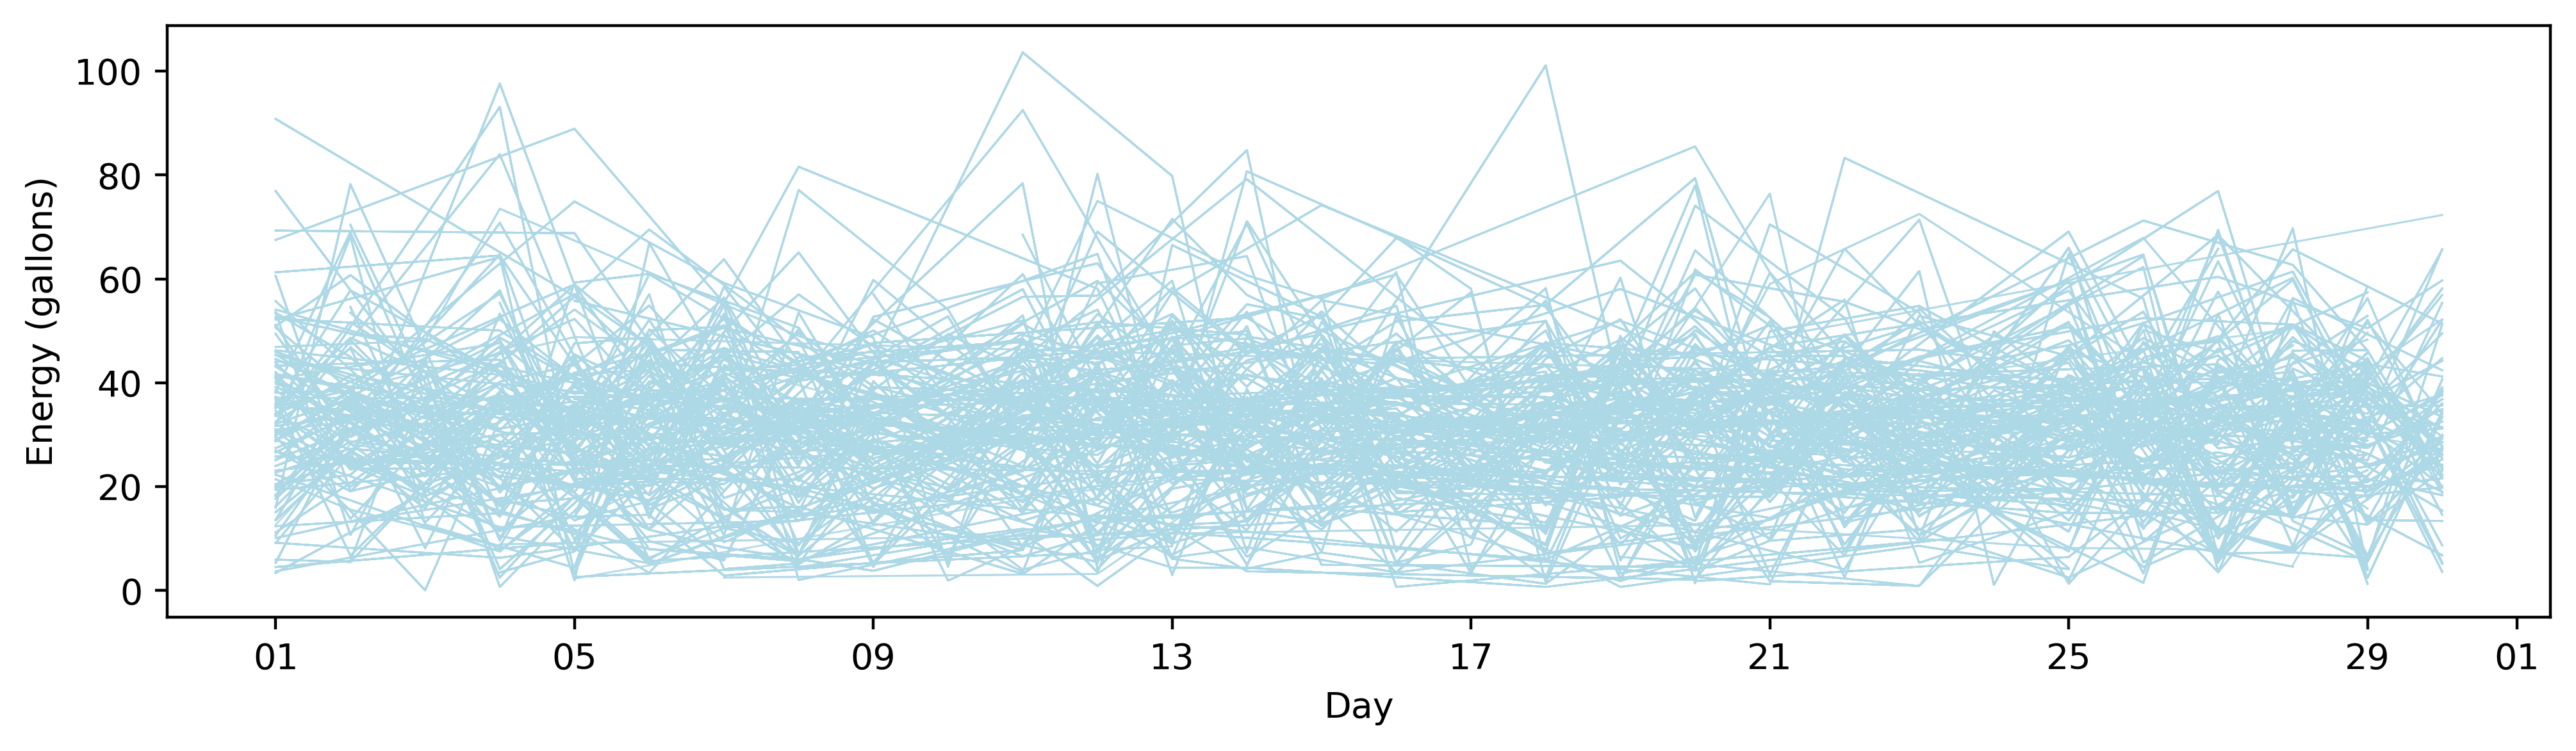

In [160]:
# set size
fig, ax = plt.subplots(figsize=(12, 3), dpi=400)

#figure(figsize=(11, 3), dpi=600)

# Plot
for v in vehicles:
    plot_df=df_validation_diesel[df_validation_diesel['equipment_id']==v]
    plt.plot(plot_df["gallons"], marker='', color='lightblue', linewidth=0.5, alpha=0.5)


date_form = DateFormatter('%d')
ax.xaxis.set_major_formatter(date_form)

# Labelling 
plt.ylabel("Energy (gallons)", fontsize=10)
plt.xlabel("Day", fontsize=10)


#red_patch = mpatches.Patch(color='red', label='Colored based on bus ID')
#plt.legend(handles=[red_patch])
#plt.grid()

# Saving
plt.savefig(r'../../figures/fuel-consumption.png', dpi=400, bbox_inches='tight')

# Display
plt.show()

In [161]:
#print(df_diesel[['gallons']].groupby(['date','equipment_id']).mean())
df=df_diesel.groupby(['date','equipment_id']).mean().reset_index()

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_17568\1001494280.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df=df_diesel.groupby(['date','equipment_id']).mean().reset_index()


In [162]:
df.gallons.mean()

29.92739757395717

In [163]:
df.gallons.median()

30.41

In [174]:
mydict = df_model.groupby('Operator')['Vehicle'].agg(list).to_dict()
d = {val:key for key, lst in mydict.items() for val in lst}
df_validation_diesel['Operator'] = df_validation_diesel['equipment_id'].map(d)

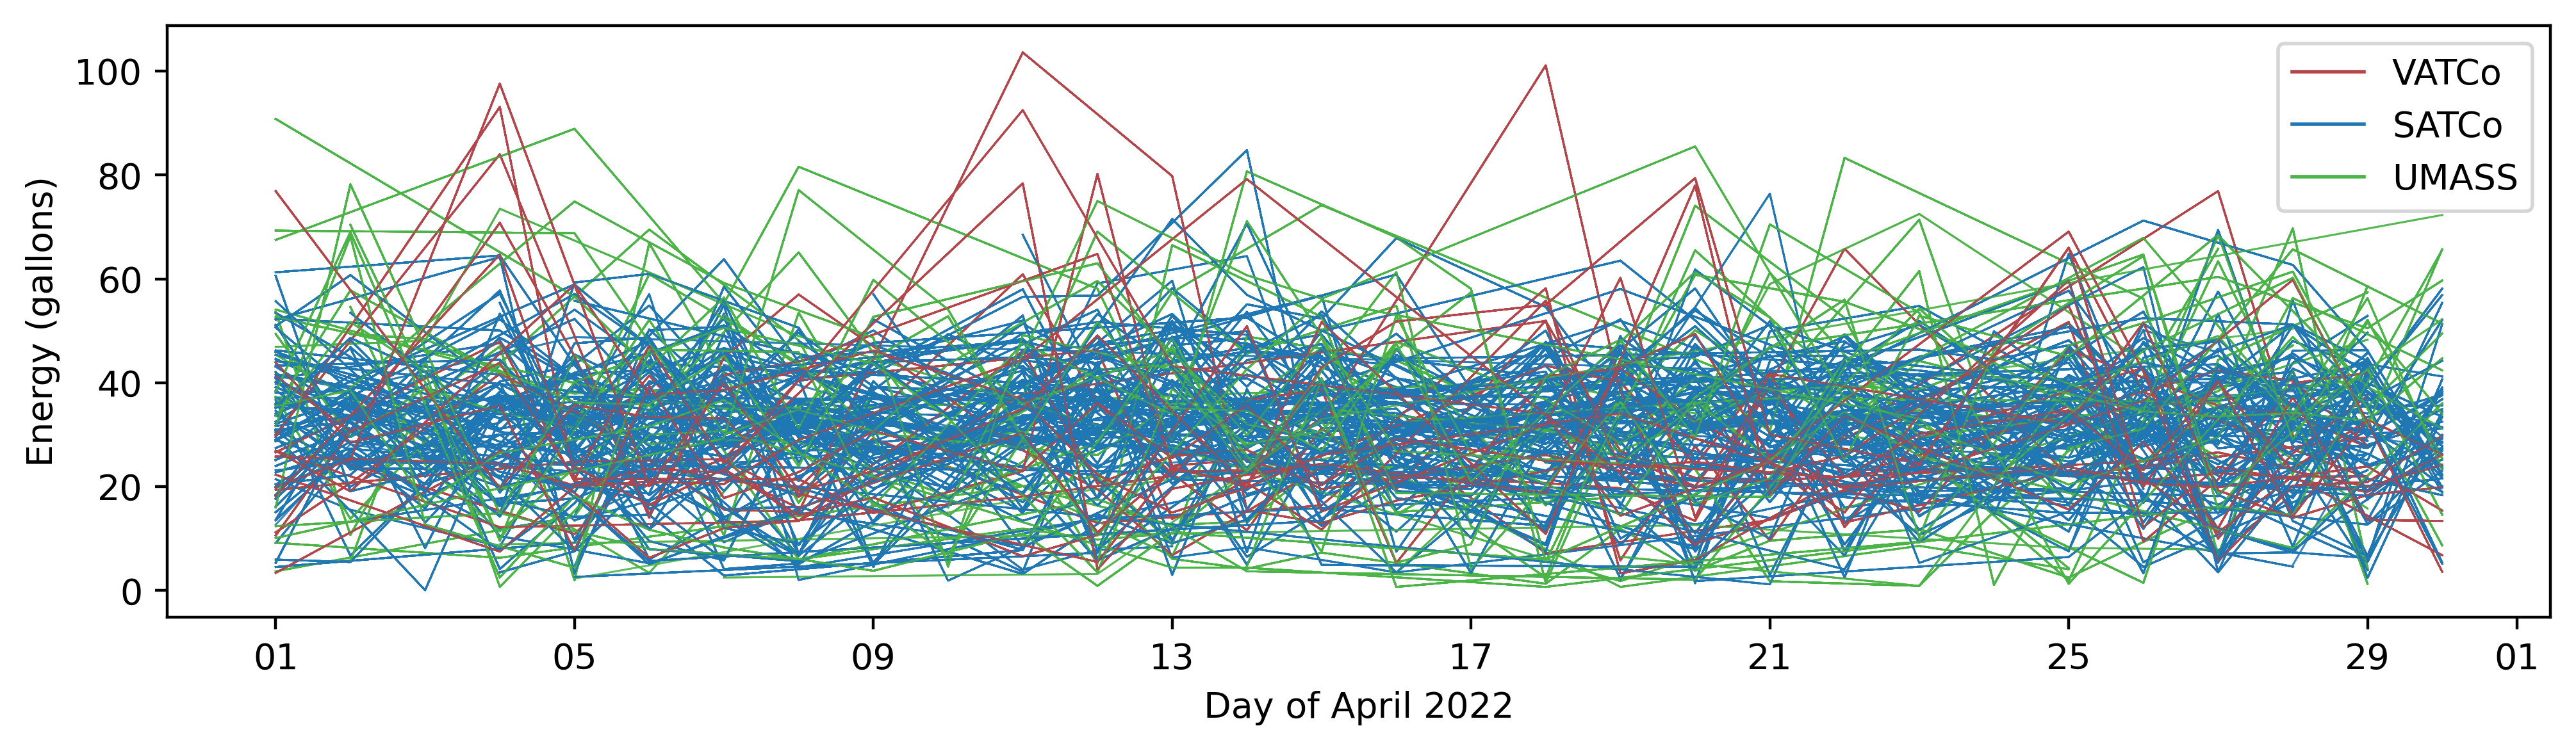

In [187]:
# set size
fig, ax = plt.subplots(figsize=(12, 3), dpi=400)

#figure(figsize=(11, 3), dpi=600)

# Plot
for v in vehicles:
    plot_df=df_validation_diesel[df_validation_diesel['equipment_id']==v]
    operator=plot_df.iloc[-1]['Operator']
    if operator=='VATCo':
        plt.plot(plot_df["gallons"], marker='', color='#B4464B', linewidth=0.5, alpha=0.5)
    elif operator=='SATCo':
        plt.plot(plot_df["gallons"], marker='', color='#1f77b4', linewidth=0.5, alpha=0.5)
    else:
        plt.plot(plot_df["gallons"], marker='', color='#4BB446', linewidth=0.5, alpha=0.5)
          
    

date_form = DateFormatter('%d')
ax.xaxis.set_major_formatter(date_form)

# Labelling 
plt.ylabel("Energy (gallons)", fontsize=10)
plt.xlabel("Day of April 2022", fontsize=10)


# Legend
custom_lines = [Line2D([0], [0], color='#B4464B', lw=1),
                Line2D([0], [0], color='#1f77b4', lw=1),
                Line2D([0], [0], color='#4BB446', lw=1)]
plt.legend(custom_lines, ['VATCo', 'SATCo', 'UMASS'])

#red_patch = mpatches.Patch(color='red', label='Colored based on bus ID')
#plt.legend(handles=[red_patch])
#plt.grid()

# Saving
plt.savefig(r'../../figures/fuel-consumption.png', dpi=400, bbox_inches='tight')

# Display
plt.show()